# HW 10: Drug Classification with Deep Learning - Neural Network
![](https://storage.googleapis.com/kaggle-datasets-images/830916/1419436/0ceafc0d2aa0e446ed4b53c650d3fd76/dataset-cover.jpg?t=2020-08-14-17-26-54)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import timeit # to measure the execution time of models
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/syr_ads_ist707/week10neural_network/hw10/drug200.csv')
df.shape

(200, 6)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


# Exploratory Data Analysis

In [ ]:
df.isnull().sum()

# no null values found in the data

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'counts of observations in Sex')

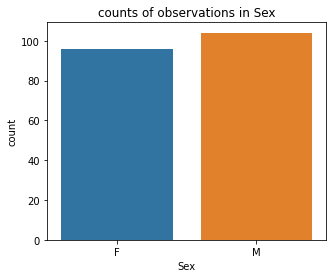

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(df['Sex'])
plt.title('counts of observations in Sex')

# data is balanced based on the sex

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'counts of observations in BP')

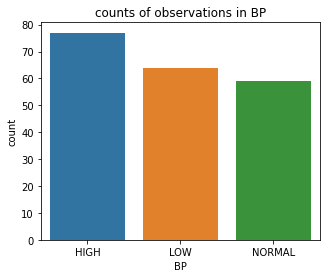

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(df['BP'])
plt.title('counts of observations in BP')

# data is quite balanced based on BP


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'counts of observations in Cholesterol')

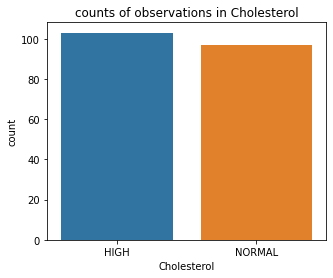

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(df['Cholesterol'])
plt.title('counts of observations in Cholesterol')

# data is balanced based on the Cholesterol

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'counts of observations in Drug')

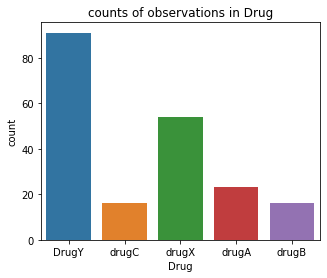

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(df['Drug'])
plt.title('counts of observations in Drug')

# there is an imbalance among Drug column,DrugY has more values than other types of drugs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age')

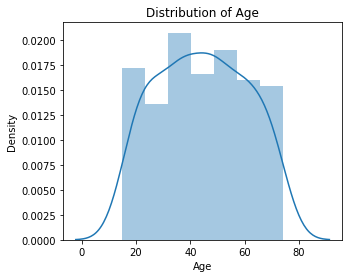

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(df['Age'])
plt.title('Distribution of Age')

# distibution of the age is uniform

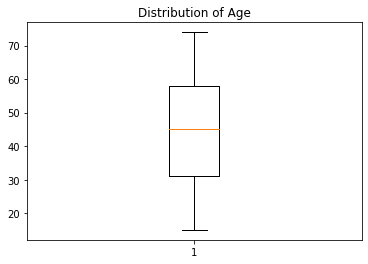

In [ ]:
plt.boxplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

# no outliers in the age column

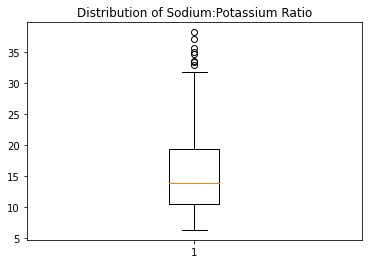

In [ ]:
plt.boxplot(df['Na_to_K'])
plt.title('Distribution of Sodium:Potassium Ratio')
plt.show()

#some outliers in Na_to_K dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sodium:Potassium ratio')

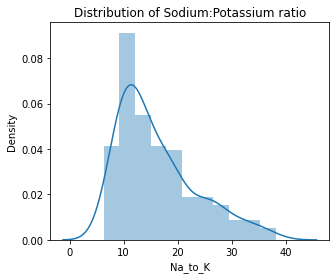

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(df['Na_to_K'])
plt.title('Distribution of Sodium:Potassium ratio')

# distibution of the age is uniform

Text(0.5, 1.0, 'Relationship between Drug & Age')

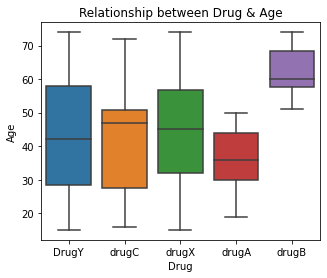

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df['Drug'],y=df['Age'])
plt.title('Relationship between Drug & Age')

# it seems that some types of drugs concern specific segments of age.
# For example,It is more probable for people with more than 60 years old to be affected with drugB

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


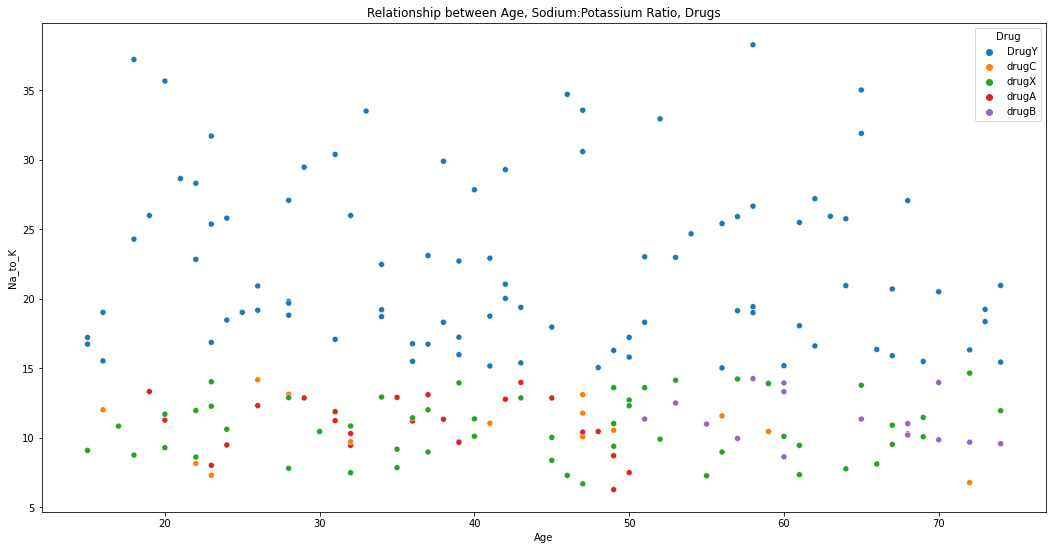

In [ ]:
plt.figure(figsize=(18,9))
sns.scatterplot('Age','Na_to_K',data = df,hue='Drug')
plt.title('Relationship between Age, Sodium:Potassium Ratio, Drugs')
plt.show()

In [ ]:
#Some observations from scatterplot
#1.People above 18 Na_to_K ratio are given Y drug
#2.DrugB is given to people with Na_to_K<18 and Age > 50.

# Data PreProcessing

Label Encoding

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

In [ ]:
# Converting string labels into numbers.
df['BP']=le.fit_transform(df['BP'])
df['Sex']=le.fit_transform(df['Sex'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df['Drug']=le.fit_transform(df['Drug'])

Split the dataset


In [ ]:
# Spliting data into dependent and independent variables
X = df.drop('Drug',axis=1)
y = df['Drug']

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140, 5), (60, 5), (140,), (60,))

In [ ]:
y_train.unique() # ensuring that we have all the drugs in y_train

array([1, 0, 2, 4, 3])

In [ ]:
y_test.unique()

array([4, 0, 3, 1, 2])

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
start = timeit.default_timer() # start time

clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

stop = timeit.default_timer() # end time

execution_time = (stop-start) 


In [ ]:
print('execution time of multinominal naive bayes classifier is {:.3f}  seconds'.format(execution_time))  

execution time of multinominal naive bayes classifier is 0.007  seconds


              precision    recall  f1-score   support

           0       1.00      0.77      0.87        26
           1       0.88      1.00      0.93         7
           2       0.50      1.00      0.67         3
           3       0.75      1.00      0.86         6
           4       1.00      1.00      1.00        18

    accuracy                           0.90        60
   macro avg       0.82      0.95      0.87        60
weighted avg       0.94      0.90      0.90        60



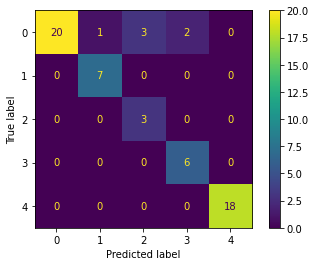

In [ ]:
# model evaluation
ConfusionMatrixDisplay.from_estimator(clf_gnb,X_test,y_test)

gnb_pred = clf_gnb.predict(X_test)
print(classification_report(y_test, gnb_pred))

# Multi Fold Cross Validation

In [ ]:
# 5 folds
splits = 5
kf =KFold(n_splits=splits, shuffle=True, random_state=42)

Fold:0, Train set: 160, Test set:40
Fold:1, Train set: 160, Test set:40
Fold:2, Train set: 160, Test set:40
Fold:3, Train set: 160, Test set:40
Fold:4, Train set: 160, Test set:40


In [ ]:
#### Model Score Using KFold
gnb = GaussianNB() 

gnb_scores = cross_val_score(gnb, X, y, scoring='f1_weighted', cv = kf)
print(gnb_scores)
print(np.mean(gnb_scores))

[0.92471695 0.88410039 0.90176471 0.80583333 0.84027778]
0.8713386312063764


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = timeit.default_timer() # start time

decision_tree_clf = DecisionTreeClassifier(random_state=0) # 'gini' to measure the purity of the split 
decision_tree_clf.fit(X_train,y_train)

stop = timeit.default_timer() # end time

execution_time = (stop-start)

print('execution time of decision tree classifier is {:.3f}  seconds'.format(execution_time))  

execution time of decision tree classifier is 0.004  seconds


[Text(0.625, 0.9, 'Na_to_K <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [65, 16, 13, 10, 36]\nclass = DrugY'),
 Text(0.5, 0.7, 'BP <= 0.5\ngini = 0.676\nsamples = 75\nvalue = [0, 16, 13, 10, 36]\nclass = drugX'),
 Text(0.25, 0.5, 'Age <= 50.5\ngini = 0.495\nsamples = 29\nvalue = [0, 16, 13, 0, 0]\nclass = drugA'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]\nclass = drugA'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]\nclass = drugB'),
 Text(0.75, 0.5, 'BP <= 1.5\ngini = 0.34\nsamples = 46\nvalue = [0, 0, 0, 10, 36]\nclass = drugX'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 0, 10, 11]\nclass = drugX'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]\nclass = drugC'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 11]\nclass = drugX'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 0, 25]\nclass = drugX'),
 Text(0.75, 0.7, 'gini = 0.0\nsam

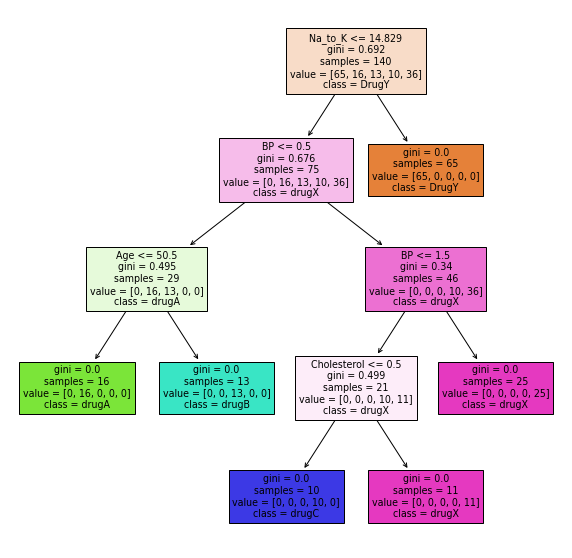

In [ ]:
# visualizing the decision tree

from sklearn import tree

temp = le.inverse_transform(y_train) # labelling drugs back to categorical values to view the decision tree outcome

plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_clf,filled=True,feature_names=list(X_train.columns), class_names=list(np.unique(temp)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



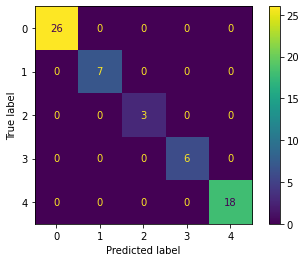

In [ ]:
# validating the model
ConfusionMatrixDisplay.from_estimator(decision_tree_clf,X_test,y_test)

decisiontree_pred = decision_tree_clf.predict(X_test)
print(classification_report(y_test, decisiontree_pred))

In [ ]:
#### Model Score Using KFold
dec_tree = DecisionTreeClassifier() 

dec_tree_scores = cross_val_score(dec_tree, X, y, scoring='f1_weighted', cv = kf)
print(dec_tree_scores)
print(np.mean(dec_tree_scores))

[1.         1.         0.97462185 0.97346154 1.        ]
0.9896166774402069


# Multi-Layer Perceptrons

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 25 neurons in the hidden layers

In [ ]:
mlpy_train = pd.get_dummies(y_train)
num_classes = y_train.nunique()

In [ ]:
def build_model(num_neurons:int):
  mlp_classifier = keras.Sequential(
      [
          keras.Input(shape=X_train.shape[1]),
          layers.Dense(num_neurons, activation='relu'),
          layers.Dense(num_classes, activation="softmax"), # similar to logistic regression in keras
      ]
  )
  return mlp_classifier

In [ ]:
mlpclf25 = build_model(25)
mlpclf25.summary()

In [ ]:
batch_size = 8
epochs = 300

# compiling the ANN - basically setting up the optimizer
mlpclf25.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = timeit.default_timer() # start time

# Fitting the ANN to the training data
history25 = mlpclf25.fit(X_train, mlpy_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

stop = timeit.default_timer() # end time

execution_time = (stop-start)

print('execution time of MLP with 25 neurons is {:.3f}  seconds'.format(execution_time))  

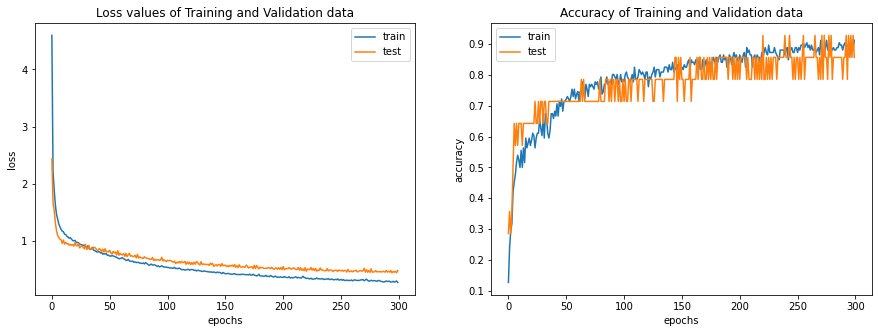

In [ ]:
def plot_history(history):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.title('Loss values of Training and Validation data')
  plt.xlabel('epochs')
  plt.ylabel('loss')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend()
  plt.title('Accuracy of Training and Validation data')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.show()

plot_history(history25)

In [ ]:
score25 = mlpclf25.evaluate(X_test, pd.get_dummies(y_test), verbose=0)
print("Test loss:{:.2f}".format(score25[0]))
print("Test accuracy:{:.2f}".format(score25[1]))

Test loss:0.43
Test accuracy:0.85


In [ ]:
mlp25_pred = mlpclf25.predict(X_test)
# picking the array index having highest probability
mlp25_pred = np.argmax(mlp25_pred,axis=-1) 

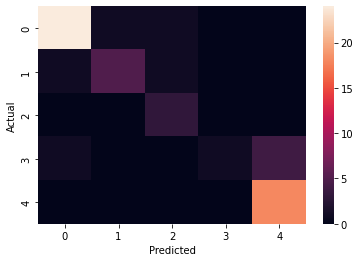

In [ ]:
# confistion matrix
confusion_matrix25 = pd.crosstab(y_test,mlp25_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix25)

In [ ]:
print(classification_report(y_test, mlp25_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.83      0.71      0.77         7
           2       0.60      1.00      0.75         3
           3       1.00      0.17      0.29         6
           4       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.83      0.76      0.73        60
weighted avg       0.87      0.85      0.83        60



# 50 neurons in the hidden layers

In [ ]:
mlpclf50 = build_model(50)
mlpclf50.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 50)                300       
                                                                 
 dense_35 (Dense)            (None, 5)                 255       
                                                                 
Total params: 555
Trainable params: 555
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 8
epochs = 300

# compiling the ANN - basically setting up the optimizer
mlpclf50.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = timeit.default_timer() # start time

# Fitting the ANN to the training data
history50 = mlpclf50.fit(X_train, mlpy_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

stop = timeit.default_timer() # end time

execution_time = (stop-start)

print('execution time of MLP with 50 neurons is {:.3f}  seconds'.format(execution_time))  

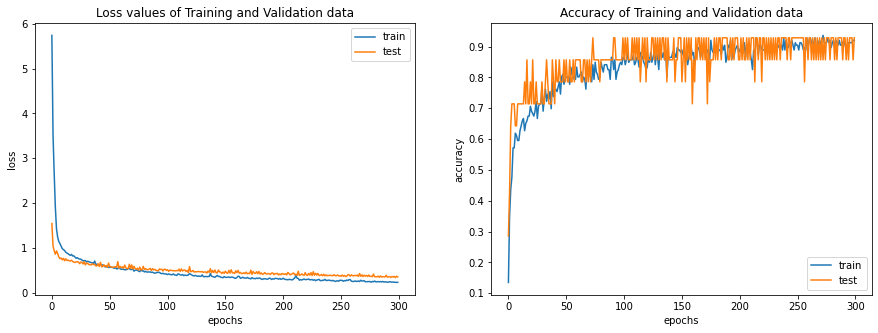

In [ ]:
plot_history(history50)

In [ ]:
score50 = mlpclf50.evaluate(X_test, pd.get_dummies(y_test), verbose=0)
print("Test loss:{:.2f}".format(score50[0]))
print("Test accuracy:{:.2f}".format(score50[1]))

Test loss:0.43
Test accuracy:0.82


In [ ]:
mlp50_pred = mlpclf50.predict(X_test)
# picking the array index having highest probability
mlp50_pred = np.argmax(mlp50_pred,axis=-1) 

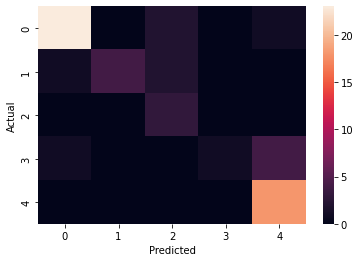

In [ ]:
# confistion matrix
confusion_matrix50 = pd.crosstab(y_test,mlp50_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix50)

In [ ]:
print(classification_report(y_test, mlp50_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       1.00      0.57      0.73         7
           2       0.43      1.00      0.60         3
           3       1.00      0.17      0.29         6
           4       0.78      1.00      0.88        18

    accuracy                           0.82        60
   macro avg       0.83      0.72      0.68        60
weighted avg       0.87      0.82      0.80        60



# 100 neurons in the hidden layers

In [ ]:
mlpclf100 = build_model(100)
mlpclf100.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               600       
                                                                 
 dense_37 (Dense)            (None, 5)                 505       
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 8
epochs = 300

# compiling the ANN - basically setting up the optimizer
mlpclf100.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = timeit.default_timer() # start time

# Fitting the ANN to the training data
history100 = mlpclf100.fit(X_train, mlpy_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

stop = timeit.default_timer() # end time

execution_time = (stop-start)

print('execution time of MLP with 100 neurons is {:.3f}  seconds'.format(execution_time))  

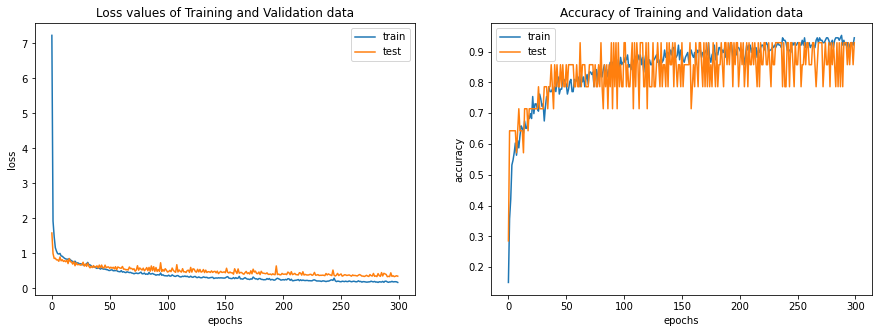

In [ ]:
plot_history(history100)

In [ ]:
score100 = mlpclf100.evaluate(X_test, pd.get_dummies(y_test), verbose=0)
print("Test loss:{:.2f}".format(score100[0]))
print("Test accuracy:{:.2f}".format(score100[1]))

Test loss:0.34
Test accuracy:0.90


In [ ]:
mlp100_pred = mlpclf100.predict(X_test)
# picking the array index having highest probability
mlp100_pred = np.argmax(mlp100_pred,axis=-1) 

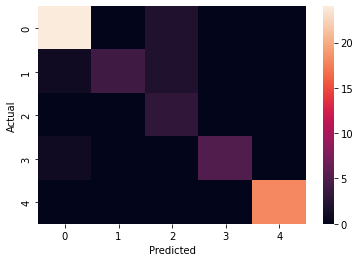

In [ ]:
# confistion matrix
confusion_matrix100 = pd.crosstab(y_test,mlp100_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix100)

In [ ]:
print(classification_report(y_test, mlp100_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       1.00      0.57      0.73         7
           2       0.43      1.00      0.60         3
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00        18

    accuracy                           0.90        60
   macro avg       0.87      0.87      0.83        60
weighted avg       0.94      0.90      0.91        60



# 200 neurons in the hidden layers

In [ ]:
mlpclf200 = build_model(200)
mlpclf200.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 200)               1200      
                                                                 
 dense_39 (Dense)            (None, 5)                 1005      
                                                                 
Total params: 2,205
Trainable params: 2,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 8
epochs = 300

# compiling the ANN - basically setting up the optimizer
mlpclf200.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = timeit.default_timer() # start time

# Fitting the ANN to the training data
history200 = mlpclf200.fit(X_train, mlpy_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)

stop = timeit.default_timer() # end time

execution_time = (stop-start)

print('execution time of MLP with 200 neurons is {:.3f}  seconds'.format(execution_time))  

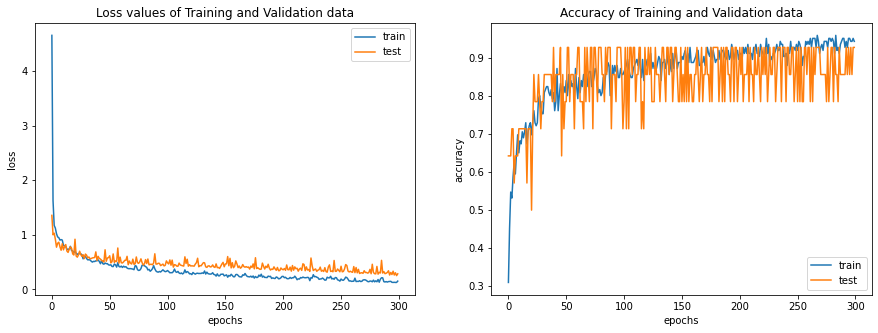

In [ ]:
plot_history(history200)

In [ ]:
score200 = mlpclf200.evaluate(X_test, pd.get_dummies(y_test), verbose=0)
print("Test loss:{:.2f}".format(score200[0]))
print("Test accuracy:{:.2f}".format(score200[1]))

Test loss:0.34
Test accuracy:0.85


In [ ]:
mlp200_pred = mlpclf200.predict(X_test)
# picking the array index having highest probability
mlp200_pred = np.argmax(mlp200_pred,axis=-1) 

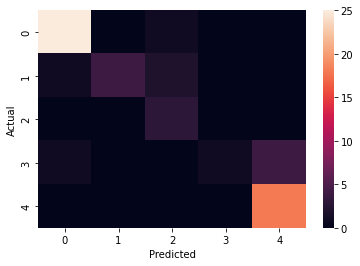

In [ ]:
# confistion matrix
confusion_matrix200 = pd.crosstab(y_test,mlp200_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix200)

In [ ]:
print(classification_report(y_test, mlp200_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       1.00      0.57      0.73         7
           2       0.50      1.00      0.67         3
           3       1.00      0.17      0.29         6
           4       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.85      0.74      0.70        60
weighted avg       0.89      0.85      0.83        60

